Thanks for:

notebook: https://www.kaggle.com/maunish/osic-super-cool-eda-and-pytorch-baseline#6-Simple-Pytorch-Model


notebook:https://www.kaggle.com/ulrich07/osic-keras-starter-with-custom-metrics

dataset: https://www.kaggle.com/rashmibanthia/osic-pulmonary-jpg

past compe used CT image:
https://qiita.com/inoichan/items/f5a43c8f0e2988cc8452
https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/discussion/117223

other pytorch notebook:
https://www.kaggle.com/havinath/eda-observations-visualizations-pytorch

metric:
https://www.kaggle.com/rohanrao/osic-understanding-laplace-log-likelihood

loss:
https://medium.com/the-artificial-impostor/quantile-regression-part-2-6fdbc26b2629

Learning rate:
https://nonbiri-tereka.hatenablog.com/entry/2016/03/10/073633

Custom Bachnorm:
 https://tantabi.com/2020/02/06/batchnormalization/

Dicom:
https://qiita.com/fukuit/items/ed163f9b566baf3a6c3f


segmentation:
https://www.kaggle.com/unforgiven/osic-comprehensive-eda

threhold:
https://carp.cc.it-hiroshima.ac.jp/~tateyama/Lecture/AppEx/PythonImageIOScikit.html

mloss:
https://www.kaggle.com/maunish/osic-super-cool-eda-and-pytorch-baseline/notebook#6-Simple-Pytorch-Model


custom objective/ metric:
https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

Middle Layer Feature Extraction:
https://teratail.com/questions/147930

In [1]:
DAY = "20200927"
#Version = "v1" # Starter code

In [2]:
#Install Miniconda
!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh && bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local
!conda update conda -y -
!source /usr/local/etc/profile.d/conda.sh
!conda init

--2020-09-29 04:31:29--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-09-29 04:31:29--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.1’

Miniconda3-latest-L 100%[===================>]  88.74M   208MB/s    in 0.4s    

2020-09-29 04:31:30 (208 MB/s) - ‘Miniconda3-latest-Lin

In [3]:
!conda install -c conda-forge python=3.7 -y
!conda install -c conda-forge gdcm pydicom -y

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cffi-1.14.3                |   py37h2b28604_0         223 KB  conda-forge
    ld_impl_linux-64-2.35      |       h769bd43_9         617 KB  conda-forge
    libffi-3.2.1               |    he1b5a44_1007          47 KB  conda-forge
    python-3.7.8               |h6f2ec95_1_cpython        53.1 MB  conda-forge
    sqlite-3.33.0              |       h4cf870e_0         1.4 MB  conda-forge
    tk-8.6.10                  |       hed695b0_0         3.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        58.6 MB

The following packages will be UPDATED:

  ld_impl_linux-64   pkgs/main::ld_impl_linu

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/My\ Drive/Kaggle/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Bengali.AI_Handwritten_Grapheme_Classification
global-wheat-detection
IEEE
Ion_Switching_University_of_Liverpool
kaggle.json
m5-forecasting-accuracy
Melanoma_classification
osic-pulmonary-fibrosis-progression
PANDA
Plant_Pathology_2020
Pneumothorax_Segmentation
utils


In [5]:
%%time
#Set Path

_PATH="/content/drive/'My Drive'/Kaggle/osic-pulmonary-fibrosis-progression"

! ls -all $_PATH
! chmod -R 777 $_PATH/input/
! mkdir -p $_PATH/output/$DAY

total 12
drwx------ 5 root root 4096 Jul  9 15:59 input
drwx------ 3 root root 4096 Sep  5 15:55 output
drwx------ 2 root root 4096 Sep  5 15:55 script
CPU times: user 18.1 ms, sys: 12.5 ms, total: 30.6 ms
Wall time: 6.44 s


In [6]:
import os
import sys

sys.path = ['/content/drive/My Drive/Kaggle/utils/EfficientNet-PyTorch/EfficientNet-PyTorch-master'] + sys.path 
sys.path

['/content/drive/My Drive/Kaggle/utils/EfficientNet-PyTorch/EfficientNet-PyTorch-master',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages/']

In [7]:
import albumentations
import copy
import cv2
import gdcm
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

from efficientnet_pytorch import model as enet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import pydicom

import random

import lightgbm as lgb
from sklearn.linear_model import Ridge

import sklearn
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,PowerTransformer
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import Pipeline

from skimage import exposure

import typing as tp
import time
from tqdm import notebook as tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import RandomSampler, SequentialSampler

print("PyTorch Version: ",torch.__version__)
print(f"sklern: {sklearn.__version__}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

PyTorch Version:  1.6.0+cu101
sklern: 0.22.2.post1
cuda


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
random_seed = 42

def seed_everything(seed):
    """
    Seeds basic parameters for reproductibility of results
    
    Arguments:
        seed {int} -- Number of the seed
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(random_seed)

In [9]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()


# Config

In [10]:
N_FOLD = 4
train_bs = 16
valid_bs = 16
n_epochs = 9999

In [11]:
data_dir = "/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/input/"
output_dir = f"/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/output/{DAY}/"

OUTPUT_DICT = output_dir

df_train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
df_test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
sample = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

image_folder = os.path.join(data_dir+'train')

kernel_type = 'train_effnet_b0'
enet_type = 'efficientnet-b0'


In [12]:
df_train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


# Model

In [13]:
#===========================================================
# model
#===========================================================
def run_single_lightgbm(
    model_param, fit_param, train_df, test_df, folds, features, target,
    fold_num=0, categorical=[], my_loss=None,
):
    trn_idx = folds[folds.fold != fold_num].index
    val_idx = folds[folds.fold == fold_num].index
    logger.info(f'len(trn_idx) : {len(trn_idx)}')
    logger.info(f'len(val_idx) : {len(val_idx)}')
    
    if categorical == []:
        trn_data = lgb.Dataset(
            train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
        val_data = lgb.Dataset(
            train_df.iloc[val_idx][features], label=target.iloc[val_idx])
    else:
        trn_data = lgb.Dataset(
            train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
            categorical_feature=categorical)
        val_data = lgb.Dataset(
            train_df.iloc[val_idx][features], label=target.iloc[val_idx],
            categorical_feature=categorical)

    oof = np.zeros((len(train_df), 2))
    predictions = np.zeros((len(test_df), 2))
    
    best_model_str = [""]
    clf = lgb.train(
        model_param, trn_data, **fit_param,
        valid_sets=[trn_data, val_data],
        fobj=my_loss.return_grad_and_hess,
        feval=my_loss.return_loss,
    )
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = fold_num

    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration)
    
    # RMSE
    logger.info("fold{} RMSE score: {:<8.5f}".format(
        fold_num, np.sqrt(mean_squared_error(target[val_idx], oof[val_idx, 0]))))
    # Competition Metric
    logger.info("fold{} Metric: {:<8.5f}".format(
        fold_num, my_loss(oof[val_idx], target[val_idx])))
    
    return oof, predictions, fold_importance_df

# Augmentations

In [14]:
train_aug = albumentations.Compose([
    albumentations.Cutout(num_holes=24, max_h_size=8, max_w_size=8, always_apply=True),
    albumentations.ShiftScaleRotate(shift_limit=0.0, scale_limit=(0.0, 0.1), rotate_limit=(-45, 45), p=1.0),
    albumentations.Transpose(p=0.7),
    albumentations.VerticalFlip(p=0.7),
    albumentations.HorizontalFlip(p=0.7),
    albumentations.RandomBrightness(limit=0.1, p=0.7),
    albumentations.RandomContrast(limit=0.1, p=0.7),
    ])

valid_aug = albumentations.Compose([])

# CT images extraction

In [15]:
#https://www.kaggle.com/unforgiven/osic-comprehensive-eda

import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.filters import threshold_otsu, median
from scipy.ndimage import binary_fill_holes
from skimage.segmentation import clear_border
from scipy.stats import describe

def load_scan(dicom_dir):
  files = os.listdir(dicom_dir)  
  files.sort(key=lambda x: (int(x[:-4]), x[:-3]))
  dcms = []
  len_files = len(files)

  if len_files < 15:
    Point = 2*len(files)//10+2
    dicom_file = os.path.join(dicom_dir, files[Point])
    dcms.append(dicom_file)

  elif len_files < 33: # 25% percentile
    Point = 3*len(files)//10
    Range = 3
    for file in files[Point: Point+Range]:
      dicom_file = os.path.join(dicom_dir, file)
      dcms.append(dicom_file)

  elif len_files > 500: # 75% percentile
    Point = 6*len(files)//10
    Range = 7
    for file in files[Point: Point+Range]:
      dicom_file = os.path.join(dicom_dir, file)
      dcms.append(dicom_file)
  else:
    Point = 4*len(files)//10
    Range = 5
    for file in files[Point: Point+Range]:
      dicom_file = os.path.join(dicom_dir, file)
      dcms.append(dicom_file)
      
  slices = []
  for scan in  dcms:
        with pydicom.dcmread(scan) as s:
            slices.append(s)
    
  slices.sort(key = lambda x: int(x.InstanceNumber))

  try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
  except:
        try:
            slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        except:
            slice_thickness = slices[0].SliceThickness
    
  for s in slices:
        s.SliceThickness = slice_thickness
        
  return slices

def get_pixels_hu(slices):
    imags = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    imags = imags.astype(np.int16)
    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    if slices[0].RescaleIntercept == -1024:
       imags[imags <= -1000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = slices[0].RescaleIntercept
    slope = slices[0].RescaleSlope
    center = slices[0].WindowCenter

    try:thresh = center*0.9
    except:thresh = center[0]*0.9
    
    if slope != 1:
        imags = slope * image.astype(np.float64)
        imags = image.astype(np.int16)
        
    imags += np.int16(intercept)

    imags = np.array(imags, dtype=np.int16)


    binaries = []
    for imag in imags:
      binary = imag <= thresh
      binaries.append(binary)
    mean_img = np.mean(binaries, axis=0)
    
    return mean_img

def conv_img(mean_img):
  h, w = mean_img.shape[:2]
  if h == w:
    h1, h2 = int(h * 0.33), int(h * 0.7)
    w1, w2 = int(w * 0.13), int(w * 0.87)
  if h > w:
    a, b = h/w, w/h
    h1, h2 = int(h * 0.3*a), int(h * 0.7*b)
    w1, w2 = int(w * 0.13), int(w * 0.87)
  if h < w:
    a, b = w/h, h/w
    h1, h2 = int(h * 0.4), int(h * 0.67)
    w1, w2 = int(w * 0.3*a), int(w * 0.8*b)
    

  mean_img = mean_img[h1: h2, w1: w2]
  mean_img = cv2.resize(mean_img, (256, 256))

  stacked_img = np.stack((mean_img,)*3, -1)
  stacked_img = exposure.equalize_adapthist(stacked_img)
  

  return stacked_img

In [16]:
from collections import defaultdict

data_dic = defaultdict()
tmp_df = df_train.reset_index(drop=True)

for pt_id in tqdm.tqdm(set(list(tmp_df.Patient))):
  dicom_dir = os.path.join(image_folder, pt_id)
  patient = load_scan(dicom_dir)
  mean_img = get_pixels_hu(patient)
  stacked_img = conv_img(mean_img)
  data_dic[dicom_dir]=stacked_img

# Middle Layer Feature Extraction

https://teratail.com/questions/147930

In [17]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import GlobalMaxPooling2D, Input
from keras.models import Model

base_model = InceptionV3(include_top=False, weights='imagenet',
                         input_tensor=Input((512, 512, 3)))

# モデル構造を可視化する。
from keras.utils import plot_model
#plot_model(base_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [18]:
# 以下の層を取り出す。
# mixed7  (None, 17, 17, 768) 
feature = base_model.get_layer('mixed7')
print(type(feature))  # <class 'keras.layers.merge.Concatenate'>
print(feature.name, feature.output_shape)  # mixed7 (None, 17, 17, 768)

# Global Average Polling 層を追加する。
output = GlobalMaxPooling2D()(feature.output)

# モデル作成
model = Model(inputs=base_model.input, outputs=output)
print(model.output_shape)  # (None, 768)

<class 'tensorflow.python.keras.layers.merge.Concatenate'>
mixed7 (None, 30, 30, 768)
(None, 768)


In [19]:
pt_lst = list(set(list(tmp_df.Patient)))
dicom_dir = os.path.join(image_folder, pt_lst[0])
img = data_dic[dicom_dir]
augmented = train_aug(image=img)
tmp = augmented["image"]
tmp = np.expand_dims(tmp, axis=0) 

for pt_id in tqdm.tqdm(pt_lst[1:]):
  dicom_dir = os.path.join(image_folder, pt_id)
  img = data_dic[dicom_dir]

  augmented = train_aug(image=img)
  img = augmented["image"]
  img = np.expand_dims(img, axis=0) 
  tmp = np.vstack([tmp, img])
print(tmp.shape)


(176, 256, 256, 3)


(176, 768)
PCA:(176, 100)


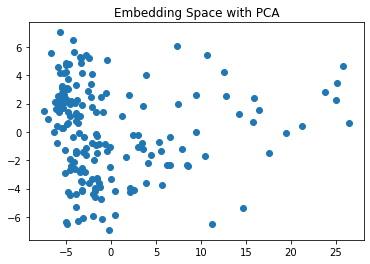

UMAP:(176, 2)


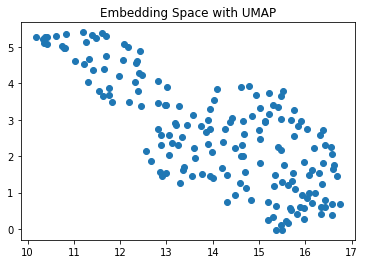

In [20]:
from sklearn.decomposition import PCA
from umap import UMAP

pca = PCA(n_components=100, random_state=42)
umap = UMAP(n_components=2, random_state=42)

# Extract Middle Layer Features
img_features = model.predict(tmp)
print(img_features.shape)

pca.fit(img_features)
# PCA
x = pca.fit_transform(img_features)
print(f"PCA:{x.shape}")
plt.scatter(x[:, 0], x[:, 1])
plt.title("Embedding Space with PCA")
plt.show()

#UMAP
x = umap.fit_transform(x)
print(f"UMAP:{x.shape}")
plt.scatter(x[:, 0], x[:, 1])
plt.title("Embedding Space with UMAP")
plt.show()

In [21]:
feature_dic = defaultdict()

for idx, pt_id in tqdm.tqdm(enumerate(set(list(tmp_df.Patient)))):
  feature_dic[pt_id] = x[idx]
feature_dic

defaultdict(None,
            {'ID00007637202177411956430': array([15.128427 ,  2.9784803], dtype=float32),
             'ID00009637202177434476278': array([14.418141 ,  3.0368826], dtype=float32),
             'ID00010637202177584971671': array([16.581188,  2.057807], dtype=float32),
             'ID00011637202177653955184': array([14.843864 ,  3.1019263], dtype=float32),
             'ID00012637202177665765362': array([16.197803 ,  2.2247841], dtype=float32),
             'ID00014637202177757139317': array([14.311971 ,  0.7422722], dtype=float32),
             'ID00015637202177877247924': array([15.618307  ,  0.16013996], dtype=float32),
             'ID00019637202178323708467': array([13.567691 ,  3.1391187], dtype=float32),
             'ID00020637202178344345685': array([10.331125,  5.22393 ], dtype=float32),
             'ID00023637202179104603099': array([15.407394 ,  3.3417857], dtype=float32),
             'ID00025637202179541264076': array([15.894249  ,  0.60792637], dtype=fl

# Metric

This competition is evaluated on a modified version of the Laplace Log Likelihood. In medical applications, it is useful to evaluate a model's confidence in its decisions. Accordingly, the metric is designed to reflect both the accuracy and certainty of each prediction.

For each true FVC measurement, you will predict both an FVC and a confidence measure (standard deviation \( \sigma \)). The metric is computed as:

$$ \sigma_{clipped} = max(\sigma, 70), $$

$$ \Delta = min ( |FVC_{true} - FVC_{predicted}|, 1000 ), $$

$$ metric = - \frac{\sqrt{2} \Delta}{\sigma_{clipped}} - \ln ( \sqrt{2} \sigma_{clipped} ). $$

The error is thresholded at 1000 ml to avoid large errors adversely penalizing results, while the confidence values are clipped at 70 ml to reflect the approximate measurement uncertainty in FVC. The final score is calculated by averaging the metric across all test set Patient_Weeks (three per patient). Note that metric values will be negative and higher is better.

https://www.kaggle.com/kfurudate/osic-baseline-lgbm-with-custom-metric/edit
## Custom Objective / Metric /Loss

The competition evaluation metric is:

$
\displaystyle \sigma_{clipped} = \max \left ( \sigma, 70 \right ) \\
\displaystyle \Delta = \min \left ( \|FVC_{ture} - FVC_{predicted}\|, 1000 \right ) \\
\displaystyle f_{metric} = - \frac{\sqrt{2} \Delta}{\sigma_{clipped}} - \ln \left( \sqrt{2} \sigma_{clipped} \right) .
$

This is too complex to directly optimize by custom metric.
Here I use negative loglilelihood loss (_NLL_) of gaussian.  

Let $FVC_{ture}$ is $t$ and $FVC_{predicted}$ is $\mu$, the _NLL_ $l$ is formulated by:

$
\displaystyle l\left( t, \mu, \sigma \right) =
-\ln \left [ \frac{1}{\sqrt{2 \pi} \sigma} \exp \left \{ - \frac{\left(t - \mu \right)^2}{2 \sigma^2} \right \} \right ]
= \frac{\left(t - \mu \right)^2}{2 \sigma^2} + \ln \left( \sqrt{2 \pi} \sigma \right).
$

`grad` and `hess` are calculated as follows:

$
\displaystyle  \frac{\partial l}{\partial \mu } = -\frac{t - \mu}{\sigma^2} \ , \ \frac{\partial^2 l}{\partial \mu^2 } = \frac{1}{\sigma^2}
$

$
\displaystyle \frac{\partial l}{\partial \sigma}
=-\frac{\left(t - \mu \right)^2}{\sigma^3} + \frac{1}{\sigma} = \frac{1}{\sigma} \left\{ 1 - \left ( \frac{t - \mu}{\sigma} \right)^2 \right \}
\\
\displaystyle \frac{\partial^2 l}{\partial \sigma^2}
= -\frac{1}{\sigma^2} \left\{ 1 - \left ( \frac{t - \mu}{\sigma} \right)^2 \right \}
+\frac{1}{\sigma} \frac{2 \left(t - \mu \right)^2 }{\sigma^3}
= -\frac{1}{\sigma^2} \left\{ 1 - 3 \left ( \frac{t - \mu}{\sigma} \right)^2 \right \}
$

For numerical stability, I replace $\sigma$ with $\displaystyle \tilde{\sigma} := \log\left(1 + \mathrm{e}^{\sigma} \right).$

$
\displaystyle l'\left( t, \mu, \sigma \right)
= \frac{\left(t - \mu \right)^2}{2 \tilde{\sigma}^2} + \ln \left( \sqrt{2 \pi} \tilde{\sigma} \right).
$

$
\displaystyle \frac{\partial l'}{\partial \mu } = -\frac{t - \mu}{\tilde{\sigma}^2} \ , \ \frac{\partial^2 l}{\partial \mu^2 } = \frac{1}{\tilde{\sigma}^2}
$
<br>

$
\displaystyle \frac{\partial l'}{\partial \sigma}
= \frac{1}{\tilde{\sigma}} \left\{ 1 - \left ( \frac{t - \mu}{\tilde{\sigma}} \right)^2 \right \} \frac{\partial \tilde{\sigma}}{\partial \sigma}
\\
\displaystyle \frac{\partial^2 l'}{\partial \sigma^2}
= -\frac{1}{\tilde{\sigma}^2}  \left\{ 1 - 3 \left ( \frac{t - \mu}{\tilde{\sigma}} \right)^2 \right \}
\left( \frac{\partial \tilde{\sigma}}{\partial \sigma} \right) ^2
+\frac{1}{\tilde{\sigma}} \left\{ 1 - \left ( \frac{t - \mu}{\tilde{\sigma}} \right)^2 \right \} \frac{\partial^2 \tilde{\sigma}}{\partial \sigma^2}
$

, where  

$
\displaystyle
\frac{\partial \tilde{\sigma}}{\partial \sigma} = \frac{1}{1 + \mathrm{e}^{-\sigma}} \\
\displaystyle
\frac{\partial^2 \tilde{\sigma}}{\partial^2 \sigma} = \frac{\mathrm{e}^{-\sigma}}{\left( 1 + \mathrm{e}^{-\sigma} \right)^2}
= \frac{\partial \tilde{\sigma}}{\partial \sigma} \left( 1 - \frac{\partial \tilde{\sigma}}{\partial \sigma} \right)
$

In [22]:
# https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric
class OSICLossForLGBM:
    """
    Custom Loss for LightGBM.
    
    * Objective: return grad & hess of NLL of gaussian
    * Evaluation: return competition metric
    """
    
    def __init__(self, epsilon: float=1) -> None:
        """Initialize."""
        self.name = "osic_loss"
        self.n_class = 2  # FVC & Confidence
        self.epsilon = epsilon
    
    def __call__(self, preds: np.ndarray, labels: np.ndarray, weight: tp.Optional[np.ndarray]=None) -> float:
        """Calc loss."""
        sigma_clip = np.maximum(preds[:, 1], 70)
        Delta = np.minimum(np.abs(preds[:, 0] - labels), 1000)
        loss_by_sample = - np.sqrt(2) * Delta / sigma_clip - np.log(np.sqrt(2) * sigma_clip)
        loss = np.average(loss_by_sample, weight)
        
        return loss
    
    def _calc_grad_and_hess(
        self, preds: np.ndarray, labels: np.ndarray, weight: tp.Optional[np.ndarray]=None
    ) -> tp.Tuple[np.ndarray]:
        """Calc Grad and Hess"""
        mu = preds[:, 0]
        sigma = preds[:, 1]
        
        sigma_t = np.log(1 + np.exp(sigma))
        grad_sigma_t = 1 / (1 + np.exp(- sigma))
        hess_sigma_t = grad_sigma_t * (1 - grad_sigma_t)
        
        grad = np.zeros_like(preds)
        hess = np.zeros_like(preds)
        grad[:, 0] = - (labels - mu) / sigma_t ** 2
        hess[:, 0] = 1 / sigma_t ** 2
        
        tmp = ((labels - mu) / sigma_t) ** 2
        grad[:, 1] = 1 / sigma_t * (1 - tmp) * grad_sigma_t
        hess[:, 1] = (
            - 1 / sigma_t ** 2 * (1 - 3 * tmp) * grad_sigma_t ** 2
            + 1 / sigma_t * (1 - tmp) * hess_sigma_t
        )
        if weight is not None:
            grad = grad * weight[:, None]
            hess = hess * weight[:, None]
        return grad, hess
    
    def return_loss(self, preds: np.ndarray, data: lgb.Dataset) -> tp.Tuple[str, float, bool]:
        """Return Loss for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T
        # # calc loss
        loss = self(preds, labels, weight)
        
        return self.name, loss, True
    
    def return_grad_and_hess(self, preds: np.ndarray, data: lgb.Dataset) -> tp.Tuple[np.ndarray]:
        """Return Grad and Hess for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T
        # # calc grad and hess.
        grad, hess =  self._calc_grad_and_hess(preds, labels, weight)

        # # reshape grad, hess: (n_example, n_class) => (n_class, n_example) => (n_class * n_example,) 
        grad = grad.T.reshape(n_example * self.n_class)
        hess = hess.T.reshape(n_example * self.n_class)
        
        return grad, hess

#Preprocess Meta Data

In [23]:
df_train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


In [24]:
#getting base week for patient
def get_baseline_week(data):
    df = data.copy()
    df['Weeks'] = df['Weeks'].astype(int)
    df['min_week'] = df.groupby('Patient')['Weeks'].transform('min')
    df['baseline_week'] = df['Weeks'] - df['min_week']
    return df

#getting FVC for base week and setting it as base_FVC of patient
def get_base_FVC(data):
    df = data.copy()
    base = df.loc[df.Weeks == df.min_week][['Patient','FVC']].copy()
    base.columns = ['Patient','base_FVC']
    
    base['nb']=1
    base['nb'] = base.groupby('Patient')['nb'].transform('cumsum')
    
    base = base[base.nb==1]
    base.drop('nb',axis =1,inplace=True)
    df = df.merge(base,on="Patient",how='left')
    df.drop(['min_week'], axis = 1)
    return df 

#getting Number of CT 
def get_N_CT(data):
    df = data.copy()
    N_CT = []
    for pt_id in df.Patient:
      png_dir = os.path.join(image_folder, pt_id)
      files = os.listdir(png_dir)
      N_CT.append(len(files))
    df["N_CT"] = N_CT
    return df


# Create feature
import itertools
def CreateFeat(df):
  def func_product(row):
    return (row[col1]) * (row[col2])
  def func_division(row):
    delta = 1e-8
    return (row[col1]+delta) / (row[col2]+delta) 
  
  Columns = df.columns 
  for col1, col2 in  tqdm.tqdm(tuple(itertools.permutations(Columns, 2))):
        df[f"{col1}_{col2}_prd"] = df[[col1, col2]].apply(func_product, axis=1)
        df[f"{col1}_{col2}_div"] = round(df[[col1, col2]].apply(func_division, axis=1), 0)

  print(f"Crated {len(df.columns) - len(Columns)} columns")
  return df

#Reduce columens
def ReduceCol(df):
  remove_cols = []
  Columns = df.columns
  
  for col1, col2 in tqdm.tqdm(tuple(itertools.permutations(Columns, 2))):
    # constant columns
    if df[col1].std() == 0: remove_cols.append(col1)
    
    # duplicated columns
    if (col1 not in remove_cols) and (col2 not in remove_cols):
      x, y = df[col1].values, df[col2].values
      if np.array_equal(x, y): remove_cols.append(col1)

  df.drop(remove_cols, inplace=True, axis=1)
  print(f"Removed {len(remove_cols)} constant & duplicated columns")

  return df

In [26]:
df_train.drop_duplicates(keep=False, inplace=True, subset=['Patient','Weeks'])
df_train = get_baseline_week(df_train)
df_train = get_base_FVC(df_train)
df_train = get_N_CT(df_train)
df_test = get_N_CT(df_test)

sample.drop("FVC", axis=1,inplace=True)
sample[["Patient","Weeks"]] = sample["Patient_Week"].str.split("_",expand=True) 
sample = sample.merge(df_test.drop("Weeks",axis=1),on="Patient",how="left")

#we have to predict for all weeks 
sample["min_Weeks"] = np.nan
sample = get_baseline_week(sample)
sample = get_base_FVC(sample)

train_columns = ['Patient', 'FVC', 'baseline_week','base_FVC','Percent','Age','Sex','SmokingStatus', "N_CT"]

train = df_train[train_columns]
test = sample[train_columns]

train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)

data = data.reset_index(drop=True)
Splitdata=data['WHERE']
data = data.drop(columns='WHERE')

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT
0,ID00007637202177411956430,2315,0,2315,58.253649,79,Male,Ex-smoker,30
1,ID00007637202177411956430,2214,9,2315,55.712129,79,Male,Ex-smoker,30
2,ID00007637202177411956430,2061,11,2315,51.862104,79,Male,Ex-smoker,30
3,ID00007637202177411956430,2144,13,2315,53.950679,79,Male,Ex-smoker,30
4,ID00007637202177411956430,2069,15,2315,52.063412,79,Male,Ex-smoker,30
...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,73,Male,Ex-smoker,28
2261,ID00421637202311550012437,2739,145,2739,82.045291,68,Male,Ex-smoker,62
2262,ID00422637202311677017371,1930,145,1930,76.672493,73,Male,Ex-smoker,473
2263,ID00423637202312137826377,3294,145,3294,79.258903,72,Male,Ex-smoker,290


In [27]:
Encoding = {"Currently smokes": 2, "Ex-smoker": 1, "Never smoked": 0, "Male": 1, "Female":0}
data['SmokingStatus'] = data.SmokingStatus.map(Encoding)
data["Sex"] = data.Sex.map(Encoding)

In [28]:
data['week'] = (data['baseline_week'] - data['baseline_week'].min() ) / ( data['baseline_week'].max() - data['baseline_week'].min())
data['percent'] = (data['Percent'] - data['Percent'].min() ) / (data['Percent'].max() - data['Percent'].min())

In [29]:
Age = []
for i in range(len(data)):
  Pt_base_age = data.Age[data.Patient == data.Patient[i]].min()
  # 365/7 = 52.14
  # 1/52.14 = 0.01917
  Pt_age = 0.0192*data.baseline_week[i] + Pt_base_age
  Age.append(Pt_age)

data["Age"] = Age
data

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,week,percent
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,30,0.000000,0.236393
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,30,0.062069,0.215941
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,30,0.075862,0.184960
3,ID00007637202177411956430,2144,13,2315,53.950679,79.2496,1,1,30,0.089655,0.201767
4,ID00007637202177411956430,2069,15,2315,52.063412,79.2880,1,1,30,0.103448,0.186580
...,...,...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,75.7840,1,1,28,1.000000,0.332421
2261,ID00421637202311550012437,2739,145,2739,82.045291,70.7840,1,1,62,1.000000,0.427848
2262,ID00422637202311677017371,1930,145,1930,76.672493,75.7840,1,1,473,1.000000,0.384612
2263,ID00423637202312137826377,3294,145,3294,79.258903,74.7840,1,1,290,1.000000,0.405425


In [30]:
data['age'] = (data['Age'] - data['Age'].min() ) / (data['Age'].max() - data['Age'].min())

In [31]:
# typical_FVC_cluster
fvc_cluster = {}

set_fvc = sorted(list(set(round(data.FVC/data.Percent*100, -2))))
for idx, fvc in enumerate(set_fvc, 1):
  fvc_cluster[fvc] = idx
fvc_cluster

{1600.0: 1,
 1700.0: 2,
 1800.0: 3,
 1900.0: 4,
 2000.0: 5,
 2100.0: 6,
 2200.0: 7,
 2300.0: 8,
 2400.0: 9,
 2500.0: 10,
 2700.0: 11,
 2800.0: 12,
 2900.0: 13,
 3000.0: 14,
 3100.0: 15,
 3200.0: 16,
 3300.0: 17,
 3400.0: 18,
 3500.0: 19,
 3600.0: 20,
 3700.0: 21,
 3800.0: 22,
 3900.0: 23,
 4000.0: 24,
 4100.0: 25,
 4200.0: 26,
 4300.0: 27,
 4400.0: 28,
 4500.0: 29,
 4600.0: 30,
 4700.0: 31,
 4800.0: 32,
 4900.0: 33}

In [32]:
typical_FVC_cluster = []
for i in range(len(data)):
  typical_FVC = round(data.FVC[i]/data.Percent[i]*100, -2)
  typical_FVC_cluster.append(fvc_cluster[typical_FVC])

data["typical_FVC_cluster"] = typical_FVC_cluster
data

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,week,percent,age,typical_FVC_cluster
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,30,0.000000,0.236393,0.746447,24
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,30,0.062069,0.215941,0.750746,24
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,30,0.075862,0.184960,0.751702,24
3,ID00007637202177411956430,2144,13,2315,53.950679,79.2496,1,1,30,0.089655,0.201767,0.752657,24
4,ID00007637202177411956430,2069,15,2315,52.063412,79.2880,1,1,30,0.103448,0.186580,0.753613,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,75.7840,1,1,28,1.000000,0.332421,0.666428,27
2261,ID00421637202311550012437,2739,145,2739,82.045291,70.7840,1,1,62,1.000000,0.427848,0.542020,17
2262,ID00422637202311677017371,1930,145,1930,76.672493,75.7840,1,1,473,1.000000,0.384612,0.666428,10
2263,ID00423637202312137826377,3294,145,3294,79.258903,74.7840,1,1,290,1.000000,0.405425,0.641546,26


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff08b760e10>,
      dtype=object)

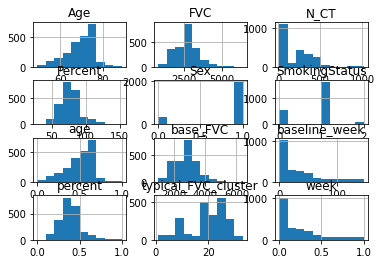

In [33]:
data.hist()

In [34]:
# log transform
data["N_CT"] = np.log1p(data.N_CT)
data["log_baseline_week"] = np.log1p(data.baseline_week)  

In [35]:
data

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,week,percent,age,typical_FVC_cluster,log_baseline_week
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,0.000000,0.236393,0.746447,24,0.000000
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,0.062069,0.215941,0.750746,24,2.302585
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,0.075862,0.184960,0.751702,24,2.484907
3,ID00007637202177411956430,2144,13,2315,53.950679,79.2496,1,1,3.433987,0.089655,0.201767,0.752657,24,2.639057
4,ID00007637202177411956430,2069,15,2315,52.063412,79.2880,1,1,3.433987,0.103448,0.186580,0.753613,24,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,75.7840,1,1,3.367296,1.000000,0.332421,0.666428,27,4.983607
2261,ID00421637202311550012437,2739,145,2739,82.045291,70.7840,1,1,4.143135,1.000000,0.427848,0.542020,17,4.983607
2262,ID00422637202311677017371,1930,145,1930,76.672493,75.7840,1,1,6.161207,1.000000,0.384612,0.666428,10,4.983607
2263,ID00423637202312137826377,3294,145,3294,79.258903,74.7840,1,1,5.673323,1.000000,0.405425,0.641546,26,4.983607


In [36]:
tmp1 = CreateFeat(data[["log_baseline_week", "Age"]])
data = pd.concat([data, tmp1], axis=1)
#remove dup colunes
data = data.loc[:,~data.columns.duplicated()]
tmp１ = ReduceCol(data.iloc[:,8:])
data = pd.concat([data.iloc[:,:8], tmp１], axis=1)
data


Crated 4 columns


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Removed 10 constant & duplicated columns


,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,week,percent,age,typical_FVC_cluster,log_baseline_week,Age_log_baseline_week_prd,Age_log_baseline_week_div
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,0.000000,0.236393,0.746447,24,0.000000,0.000000,7.900000e+09
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,0.062069,0.215941,0.750746,24,2.302585,182.302109,3.400000e+01
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,0.075862,0.184960,0.751702,24,2.484907,196.832438,3.200000e+01
3,ID00007637202177411956430,2144,13,2315,53.950679,79.2496,1,1,3.433987,0.089655,0.201767,0.752657,24,2.639057,209.144238,3.000000e+01
4,ID00007637202177411956430,2069,15,2315,52.063412,79.2880,1,1,3.433987,0.103448,0.186580,0.753613,24,2.772589,219.833015,2.900000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,75.7840,1,1,3.367296,1.000000,0.332421,0.666428,27,4.983607,377.677644,1.500000e+01
2261,ID00421637202311550012437,2739,145,2739,82.045291,70.7840,1,1,4.143135,1.000000,0.427848,0.542020,17,4.983607,352.759611,1.400000e+01
2262,ID00422637202311677017371,1930,145,1930,76.672493,75.7840,1,1,6.161207,1.000000,0.384612,0.666428,10,4.983607,377.677644,1.500000e+01
2263,ID00423637202312137826377,3294,145,3294,79.258903,74.7840,1,1,5.673323,1.000000,0.405425,0.641546,26,4.983607,372.694038,1.500000e+01


In [37]:
tmp1 = CreateFeat(data[["N_CT", "age"]])
data = pd.concat([data, tmp1], axis=1)
#remove dup colunes
data = data.loc[:,~data.columns.duplicated()]
tmp１ = ReduceCol(data.iloc[:,8:])
data = pd.concat([data.iloc[:,:8], tmp１], axis=1)
data


Crated 4 columns


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Removed 12 constant & duplicated columns


,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,week,percent,age,typical_FVC_cluster,log_baseline_week,Age_log_baseline_week_prd,Age_log_baseline_week_div,N_CT_age_div,age_N_CT_prd
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,0.000000,0.236393,0.746447,24,0.000000,0.000000,7.900000e+09,5.0,2.563289
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,0.062069,0.215941,0.750746,24,2.302585,182.302109,3.400000e+01,5.0,2.578054
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,0.075862,0.184960,0.751702,24,2.484907,196.832438,3.200000e+01,5.0,2.581335
3,ID00007637202177411956430,2144,13,2315,53.950679,79.2496,1,1,3.433987,0.089655,0.201767,0.752657,24,2.639057,209.144238,3.000000e+01,5.0,2.584616
4,ID00007637202177411956430,2069,15,2315,52.063412,79.2880,1,1,3.433987,0.103448,0.186580,0.753613,24,2.772589,219.833015,2.900000e+01,5.0,2.587897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,75.7840,1,1,3.367296,1.000000,0.332421,0.666428,27,4.983607,377.677644,1.500000e+01,5.0,2.244060
2261,ID00421637202311550012437,2739,145,2739,82.045291,70.7840,1,1,4.143135,1.000000,0.427848,0.542020,17,4.983607,352.759611,1.400000e+01,8.0,2.245662
2262,ID00422637202311677017371,1930,145,1930,76.672493,75.7840,1,1,6.161207,1.000000,0.384612,0.666428,10,4.983607,377.677644,1.500000e+01,9.0,4.106000
2263,ID00423637202312137826377,3294,145,3294,79.258903,74.7840,1,1,5.673323,1.000000,0.405425,0.641546,26,4.983607,372.694038,1.500000e+01,9.0,3.639699


In [38]:
data

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,week,percent,age,typical_FVC_cluster,log_baseline_week,Age_log_baseline_week_prd,Age_log_baseline_week_div,N_CT_age_div,age_N_CT_prd
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,0.000000,0.236393,0.746447,24,0.000000,0.000000,7.900000e+09,5.0,2.563289
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,0.062069,0.215941,0.750746,24,2.302585,182.302109,3.400000e+01,5.0,2.578054
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,0.075862,0.184960,0.751702,24,2.484907,196.832438,3.200000e+01,5.0,2.581335
3,ID00007637202177411956430,2144,13,2315,53.950679,79.2496,1,1,3.433987,0.089655,0.201767,0.752657,24,2.639057,209.144238,3.000000e+01,5.0,2.584616
4,ID00007637202177411956430,2069,15,2315,52.063412,79.2880,1,1,3.433987,0.103448,0.186580,0.753613,24,2.772589,219.833015,2.900000e+01,5.0,2.587897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,ID00419637202311204720264,3020,145,3020,70.186855,75.7840,1,1,3.367296,1.000000,0.332421,0.666428,27,4.983607,377.677644,1.500000e+01,5.0,2.244060
2261,ID00421637202311550012437,2739,145,2739,82.045291,70.7840,1,1,4.143135,1.000000,0.427848,0.542020,17,4.983607,352.759611,1.400000e+01,8.0,2.245662
2262,ID00422637202311677017371,1930,145,1930,76.672493,75.7840,1,1,6.161207,1.000000,0.384612,0.666428,10,4.983607,377.677644,1.500000e+01,9.0,4.106000
2263,ID00423637202312137826377,3294,145,3294,79.258903,74.7840,1,1,5.673323,1.000000,0.405425,0.641546,26,4.983607,372.694038,1.500000e+01,9.0,3.639699


In [39]:
# clipping
clipping = data.columns[8:]
for col in clipping:
  upperbound, lowerbound = np.percentile(data[col], [1, 99])
  data[col] = np.clip(data[col], upperbound, lowerbound)

In [40]:
def CreateFeat2(df):
  func_list = ("max", "min", "mean", "median", "mad", "var", "std")#, "skew","kurt")
  Columns = df.columns 
  for idx, func in enumerate(func_list):
    print(f"{idx}/{len(func_list)}: Calucurating... {func}")
    for col1, col2 in tqdm.tqdm(tuple(itertools.permutations(Columns, 2))):
      df[f"{col1}_{col2}_{func}"] = df[[col1, col2]].apply(func, axis=1)
  print(f"Crated {len(df.columns) - len(Columns)} columns")
  return df

tmp = CreateFeat2(data[["week", "percent", "age", "log_baseline_week", "Age_log_baseline_week_prd", "Age_log_baseline_week_div", "N_CT_age_div", "age_N_CT_prd"]])

data = pd.concat([data, tmp], axis=1)
data= data.loc[:,~data.columns.duplicated()]
tmp = ReduceCol(data.iloc[:,8:])
data = pd.concat([data.iloc[:,:8], tmp], axis=1)

data

0/7: Calucurating... max



1/7: Calucurating... min


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



2/7: Calucurating... mean



3/7: Calucurating... median



4/7: Calucurating... mad



5/7: Calucurating... var



6/7: Calucurating... std



Crated 392 columns



Removed 250 constant & duplicated columns


,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,typical_FVC_cluster,percent_week_max,age_week_max,age_percent_max,log_baseline_week_percent_max,log_baseline_week_age_max,Age_log_baseline_week_prd_percent_max,Age_log_baseline_week_prd_age_max,Age_log_baseline_week_prd_log_baseline_week_max,Age_log_baseline_week_div_Age_log_baseline_week_prd_max,N_CT_age_div_log_baseline_week_max,N_CT_age_div_Age_log_baseline_week_prd_max,N_CT_age_div_Age_log_baseline_week_div_max,age_N_CT_prd_week_max,age_N_CT_prd_percent_max,age_N_CT_prd_log_baseline_week_max,age_N_CT_prd_Age_log_baseline_week_prd_max,age_N_CT_prd_Age_log_baseline_week_div_max,age_N_CT_prd_N_CT_age_div_max,percent_week_min,age_week_min,age_percent_min,log_baseline_week_percent_min,log_baseline_week_age_min,Age_log_baseline_week_prd_percent_min,Age_log_baseline_week_prd_age_min,Age_log_baseline_week_div_log_baseline_week_min,Age_log_baseline_week_div_Age_log_baseline_week_prd_min,N_CT_age_div_week_min,N_CT_age_div_percent_min,N_CT_age_div_log_baseline_week_min,...,N_CT_age_div_percent_var,N_CT_age_div_age_var,N_CT_age_div_log_baseline_week_var,N_CT_age_div_Age_log_baseline_week_prd_var,N_CT_age_div_Age_log_baseline_week_div_var,age_N_CT_prd_week_var,age_N_CT_prd_percent_var,age_N_CT_prd_age_var,age_N_CT_prd_log_baseline_week_var,age_N_CT_prd_Age_log_baseline_week_prd_var,age_N_CT_prd_Age_log_baseline_week_div_var,age_N_CT_prd_N_CT_age_div_var,percent_week_std,age_week_std,age_percent_std,log_baseline_week_week_std,log_baseline_week_percent_std,log_baseline_week_age_std,Age_log_baseline_week_prd_week_std,Age_log_baseline_week_prd_percent_std,Age_log_baseline_week_prd_age_std,Age_log_baseline_week_prd_log_baseline_week_std,Age_log_baseline_week_div_week_std,Age_log_baseline_week_div_percent_std,Age_log_baseline_week_div_age_std,Age_log_baseline_week_div_log_baseline_week_std,Age_log_baseline_week_div_Age_log_baseline_week_prd_std,N_CT_age_div_week_std,N_CT_age_div_percent_std,N_CT_age_div_age_std,N_CT_age_div_log_baseline_week_std,N_CT_age_div_Age_log_baseline_week_prd_std,N_CT_age_div_Age_log_baseline_week_div_std,age_N_CT_prd_week_std,age_N_CT_prd_percent_std,age_N_CT_prd_age_std,age_N_CT_prd_log_baseline_week_std,age_N_CT_prd_Age_log_baseline_week_prd_std,age_N_CT_prd_Age_log_baseline_week_div_std,age_N_CT_prd_N_CT_age_div_std
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,24,0.236393,0.746447,0.746447,0.236393,0.746447,0.236393,0.746447,0.000000,7.400000e+09,5.0,5.000000,7.400000e+09,2.563289,2.563289,2.563289,2.563289,7.400000e+09,5.0,0.000000,0.000000,0.236393,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.236393,0.000000,...,11.345975,9.046357,12.500000,12.500000,2.738000e+19,3.285226,2.707222,1.650458,3.285226,3.285226,2.738000e+19,2.968780,0.167155,0.527818,0.360662,0.000000,0.167155,0.527818,0.000000,0.167155,0.527818,0.000000,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,3.535534,3.368379,3.007716,3.535534,3.535534,5.232590e+09,1.812519,1.645364,1.284701,1.812519,1.812519,5.232590e+09,1.723015
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,24,0.215941,0.750746,0.750746,2.302585,2.302585,182.302109,182.302109,182.302109,1.823021e+02,5.0,182.302109,3.400000e+01,2.578054,2.578054,2.578054,182.302109,3.400000e+01,5.0,0.062069,0.062069,0.215941,0.215941,0.750746,0.215941,0.750746,2.302585,34.0,0.062069,0.215941,2.302585,...,11.443609,9.028078,3.638024,15718.018937,4.205000e+02,3.165090,2.789787,1.669526,0.037941,16150.368037,4.936694e+02,2.932912,0.108804,0.486969,0.378164,1.584284,1.475480,1.097316,128.863168,128.754364,128.376200,127.278884,2.399774e+01,2.388894e+01,2.351077e+01,2.241346e+01,1.048654e+02,3.491645,3.382840,3.004676,1.907360,125.371524,2.050610e+01,1.779070,1.670266,1.292101,0.194786,127.084098,2.221867e+01,1.712575
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,24,0.184960,0.751702,0.751702,2.484907,2.484907,196.832438,196.832438,

In [41]:
features = feature_dic[data.Patient[0]]
for pt_id in data.Patient[1:]:
  features = np.vstack([features, feature_dic[pt_id]])
features

array([[15.128427  ,  2.9784803 ],
       [15.128427  ,  2.9784803 ],
       [15.128427  ,  2.9784803 ],
       ...,
       [16.088333  ,  0.9990004 ],
       [16.34413   ,  0.59273106],
       [15.682423  ,  2.9959676 ]], dtype=float32)

In [42]:
img_feature1 = features[:,0].tolist()
img_feature2 = features[:,1].tolist()

In [43]:
data["img_feature1"] = img_feature1
data["img_feature2"] = img_feature2
data

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,typical_FVC_cluster,percent_week_max,age_week_max,age_percent_max,log_baseline_week_percent_max,log_baseline_week_age_max,Age_log_baseline_week_prd_percent_max,Age_log_baseline_week_prd_age_max,Age_log_baseline_week_prd_log_baseline_week_max,Age_log_baseline_week_div_Age_log_baseline_week_prd_max,N_CT_age_div_log_baseline_week_max,N_CT_age_div_Age_log_baseline_week_prd_max,N_CT_age_div_Age_log_baseline_week_div_max,age_N_CT_prd_week_max,age_N_CT_prd_percent_max,age_N_CT_prd_log_baseline_week_max,age_N_CT_prd_Age_log_baseline_week_prd_max,age_N_CT_prd_Age_log_baseline_week_div_max,age_N_CT_prd_N_CT_age_div_max,percent_week_min,age_week_min,age_percent_min,log_baseline_week_percent_min,log_baseline_week_age_min,Age_log_baseline_week_prd_percent_min,Age_log_baseline_week_prd_age_min,Age_log_baseline_week_div_log_baseline_week_min,Age_log_baseline_week_div_Age_log_baseline_week_prd_min,N_CT_age_div_week_min,N_CT_age_div_percent_min,N_CT_age_div_log_baseline_week_min,...,N_CT_age_div_log_baseline_week_var,N_CT_age_div_Age_log_baseline_week_prd_var,N_CT_age_div_Age_log_baseline_week_div_var,age_N_CT_prd_week_var,age_N_CT_prd_percent_var,age_N_CT_prd_age_var,age_N_CT_prd_log_baseline_week_var,age_N_CT_prd_Age_log_baseline_week_prd_var,age_N_CT_prd_Age_log_baseline_week_div_var,age_N_CT_prd_N_CT_age_div_var,percent_week_std,age_week_std,age_percent_std,log_baseline_week_week_std,log_baseline_week_percent_std,log_baseline_week_age_std,Age_log_baseline_week_prd_week_std,Age_log_baseline_week_prd_percent_std,Age_log_baseline_week_prd_age_std,Age_log_baseline_week_prd_log_baseline_week_std,Age_log_baseline_week_div_week_std,Age_log_baseline_week_div_percent_std,Age_log_baseline_week_div_age_std,Age_log_baseline_week_div_log_baseline_week_std,Age_log_baseline_week_div_Age_log_baseline_week_prd_std,N_CT_age_div_week_std,N_CT_age_div_percent_std,N_CT_age_div_age_std,N_CT_age_div_log_baseline_week_std,N_CT_age_div_Age_log_baseline_week_prd_std,N_CT_age_div_Age_log_baseline_week_div_std,age_N_CT_prd_week_std,age_N_CT_prd_percent_std,age_N_CT_prd_age_std,age_N_CT_prd_log_baseline_week_std,age_N_CT_prd_Age_log_baseline_week_prd_std,age_N_CT_prd_Age_log_baseline_week_div_std,age_N_CT_prd_N_CT_age_div_std,img_feature1,img_feature2
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,24,0.236393,0.746447,0.746447,0.236393,0.746447,0.236393,0.746447,0.000000,7.400000e+09,5.0,5.000000,7.400000e+09,2.563289,2.563289,2.563289,2.563289,7.400000e+09,5.0,0.000000,0.000000,0.236393,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.236393,0.000000,...,12.500000,12.500000,2.738000e+19,3.285226,2.707222,1.650458,3.285226,3.285226,2.738000e+19,2.968780,0.167155,0.527818,0.360662,0.000000,0.167155,0.527818,0.000000,0.167155,0.527818,0.000000,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,3.535534,3.368379,3.007716,3.535534,3.535534,5.232590e+09,1.812519,1.645364,1.284701,1.812519,1.812519,5.232590e+09,1.723015,15.128427,2.978480
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,24,0.215941,0.750746,0.750746,2.302585,2.302585,182.302109,182.302109,182.302109,1.823021e+02,5.0,182.302109,3.400000e+01,2.578054,2.578054,2.578054,182.302109,3.400000e+01,5.0,0.062069,0.062069,0.215941,0.215941,0.750746,0.215941,0.750746,2.302585,34.0,0.062069,0.215941,2.302585,...,3.638024,15718.018937,4.205000e+02,3.165090,2.789787,1.669526,0.037941,16150.368037,4.936694e+02,2.932912,0.108804,0.486969,0.378164,1.584284,1.475480,1.097316,128.863168,128.754364,128.376200,127.278884,2.399774e+01,2.388894e+01,2.351077e+01,2.241346e+01,1.048654e+02,3.491645,3.382840,3.004676,1.907360,125.371524,2.050610e+01,1.779070,1.670266,1.292101,0.194786,127.084098,2.221867e+01,1.712575,15.128427,2.978480
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,24,0.184960,0.751702,0.751702,2.484907,2.484907,196.832438,196.832438,196.832438,1.968324e

In [44]:
# clipping
clipping = data.columns[8:]
for col in clipping:
  upperbound, lowerbound = np.percentile(data[col], [1, 99])
  data[col] = np.clip(data[col], upperbound, lowerbound)

In [45]:
data['WHERE'] = Splitdata
data

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,typical_FVC_cluster,percent_week_max,age_week_max,age_percent_max,log_baseline_week_percent_max,log_baseline_week_age_max,Age_log_baseline_week_prd_percent_max,Age_log_baseline_week_prd_age_max,Age_log_baseline_week_prd_log_baseline_week_max,Age_log_baseline_week_div_Age_log_baseline_week_prd_max,N_CT_age_div_log_baseline_week_max,N_CT_age_div_Age_log_baseline_week_prd_max,N_CT_age_div_Age_log_baseline_week_div_max,age_N_CT_prd_week_max,age_N_CT_prd_percent_max,age_N_CT_prd_log_baseline_week_max,age_N_CT_prd_Age_log_baseline_week_prd_max,age_N_CT_prd_Age_log_baseline_week_div_max,age_N_CT_prd_N_CT_age_div_max,percent_week_min,age_week_min,age_percent_min,log_baseline_week_percent_min,log_baseline_week_age_min,Age_log_baseline_week_prd_percent_min,Age_log_baseline_week_prd_age_min,Age_log_baseline_week_div_log_baseline_week_min,Age_log_baseline_week_div_Age_log_baseline_week_prd_min,N_CT_age_div_week_min,N_CT_age_div_percent_min,N_CT_age_div_log_baseline_week_min,...,N_CT_age_div_Age_log_baseline_week_prd_var,N_CT_age_div_Age_log_baseline_week_div_var,age_N_CT_prd_week_var,age_N_CT_prd_percent_var,age_N_CT_prd_age_var,age_N_CT_prd_log_baseline_week_var,age_N_CT_prd_Age_log_baseline_week_prd_var,age_N_CT_prd_Age_log_baseline_week_div_var,age_N_CT_prd_N_CT_age_div_var,percent_week_std,age_week_std,age_percent_std,log_baseline_week_week_std,log_baseline_week_percent_std,log_baseline_week_age_std,Age_log_baseline_week_prd_week_std,Age_log_baseline_week_prd_percent_std,Age_log_baseline_week_prd_age_std,Age_log_baseline_week_prd_log_baseline_week_std,Age_log_baseline_week_div_week_std,Age_log_baseline_week_div_percent_std,Age_log_baseline_week_div_age_std,Age_log_baseline_week_div_log_baseline_week_std,Age_log_baseline_week_div_Age_log_baseline_week_prd_std,N_CT_age_div_week_std,N_CT_age_div_percent_std,N_CT_age_div_age_std,N_CT_age_div_log_baseline_week_std,N_CT_age_div_Age_log_baseline_week_prd_std,N_CT_age_div_Age_log_baseline_week_div_std,age_N_CT_prd_week_std,age_N_CT_prd_percent_std,age_N_CT_prd_age_std,age_N_CT_prd_log_baseline_week_std,age_N_CT_prd_Age_log_baseline_week_prd_std,age_N_CT_prd_Age_log_baseline_week_div_std,age_N_CT_prd_N_CT_age_div_std,img_feature1,img_feature2,WHERE
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,24,0.236393,0.746447,0.746447,0.243796,0.746447,0.243796,0.746447,0.000000,7.400000e+09,5.0,6.000000,7.400000e+09,2.563289,2.563289,2.563289,2.563289,7.400000e+09,5.0,0.000000,0.000000,0.236393,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.236393,0.000000,...,18.000000,2.738000e+19,3.285226,2.707222,1.650458,3.285226,3.285226,2.738000e+19,2.968780,0.167155,0.527818,0.360662,0.000000,0.167155,0.527818,0.000000,0.172390,0.527818,0.000000,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,3.535534,3.368379,3.007716,3.535534,4.242641,5.232590e+09,1.812519,1.645364,1.284701,1.812519,1.812519,5.232590e+09,1.723015,15.128427,2.978480,train
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,24,0.215941,0.750746,0.750746,2.302585,2.302585,182.302109,182.302109,182.302109,1.823021e+02,5.0,182.302109,3.400000e+01,2.578054,2.578054,2.578054,182.302109,3.400000e+01,5.0,0.062069,0.062069,0.215941,0.215941,0.750746,0.215941,0.750746,2.302585,34.0,0.062069,0.215941,2.302585,...,15718.018937,4.205000e+02,3.165090,2.789787,1.669526,0.037941,16150.368037,4.936694e+02,2.932912,0.108804,0.486969,0.366417,1.584284,1.475480,1.097316,128.863168,128.754364,128.376200,127.278884,2.399774e+01,2.388894e+01,2.351077e+01,2.241346e+01,1.048654e+02,3.491645,3.382840,3.004676,1.907360,125.371524,2.050610e+01,1.779070,1.670266,1.292101,0.194786,127.084098,2.221867e+01,1.712575,15.128427,2.978480,train
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,24,0.184960,0.751702,0.751702,2.484907,2.484907,196.832438,196.832438,196.832438,1.968324e+02,5.0,196.832438,3.200000e+01,2.58

In [46]:
train = data[data['WHERE']=="train"]
test = data[data['WHERE']=="test"]

In [47]:
train

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,typical_FVC_cluster,percent_week_max,age_week_max,age_percent_max,log_baseline_week_percent_max,log_baseline_week_age_max,Age_log_baseline_week_prd_percent_max,Age_log_baseline_week_prd_age_max,Age_log_baseline_week_prd_log_baseline_week_max,Age_log_baseline_week_div_Age_log_baseline_week_prd_max,N_CT_age_div_log_baseline_week_max,N_CT_age_div_Age_log_baseline_week_prd_max,N_CT_age_div_Age_log_baseline_week_div_max,age_N_CT_prd_week_max,age_N_CT_prd_percent_max,age_N_CT_prd_log_baseline_week_max,age_N_CT_prd_Age_log_baseline_week_prd_max,age_N_CT_prd_Age_log_baseline_week_div_max,age_N_CT_prd_N_CT_age_div_max,percent_week_min,age_week_min,age_percent_min,log_baseline_week_percent_min,log_baseline_week_age_min,Age_log_baseline_week_prd_percent_min,Age_log_baseline_week_prd_age_min,Age_log_baseline_week_div_log_baseline_week_min,Age_log_baseline_week_div_Age_log_baseline_week_prd_min,N_CT_age_div_week_min,N_CT_age_div_percent_min,N_CT_age_div_log_baseline_week_min,...,N_CT_age_div_Age_log_baseline_week_prd_var,N_CT_age_div_Age_log_baseline_week_div_var,age_N_CT_prd_week_var,age_N_CT_prd_percent_var,age_N_CT_prd_age_var,age_N_CT_prd_log_baseline_week_var,age_N_CT_prd_Age_log_baseline_week_prd_var,age_N_CT_prd_Age_log_baseline_week_div_var,age_N_CT_prd_N_CT_age_div_var,percent_week_std,age_week_std,age_percent_std,log_baseline_week_week_std,log_baseline_week_percent_std,log_baseline_week_age_std,Age_log_baseline_week_prd_week_std,Age_log_baseline_week_prd_percent_std,Age_log_baseline_week_prd_age_std,Age_log_baseline_week_prd_log_baseline_week_std,Age_log_baseline_week_div_week_std,Age_log_baseline_week_div_percent_std,Age_log_baseline_week_div_age_std,Age_log_baseline_week_div_log_baseline_week_std,Age_log_baseline_week_div_Age_log_baseline_week_prd_std,N_CT_age_div_week_std,N_CT_age_div_percent_std,N_CT_age_div_age_std,N_CT_age_div_log_baseline_week_std,N_CT_age_div_Age_log_baseline_week_prd_std,N_CT_age_div_Age_log_baseline_week_div_std,age_N_CT_prd_week_std,age_N_CT_prd_percent_std,age_N_CT_prd_age_std,age_N_CT_prd_log_baseline_week_std,age_N_CT_prd_Age_log_baseline_week_prd_std,age_N_CT_prd_Age_log_baseline_week_div_std,age_N_CT_prd_N_CT_age_div_std,img_feature1,img_feature2,WHERE
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,24,0.236393,0.746447,0.746447,0.243796,0.746447,0.243796,0.746447,0.000000,7.400000e+09,5.0,6.000000,7.400000e+09,2.563289,2.563289,2.563289,2.563289,7.400000e+09,5.0,0.000000,0.000000,0.236393,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.236393,0.000000,...,18.000000,2.738000e+19,3.285226,2.707222,1.650458,3.285226,3.285226,2.738000e+19,2.968780,0.167155,0.527818,0.360662,0.000000,0.167155,0.527818,0.000000,0.172390,0.527818,0.000000,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,3.535534,3.368379,3.007716,3.535534,4.242641,5.232590e+09,1.812519,1.645364,1.284701,1.812519,1.812519,5.232590e+09,1.723015,15.128427,2.978480,train
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,24,0.215941,0.750746,0.750746,2.302585,2.302585,182.302109,182.302109,182.302109,1.823021e+02,5.0,182.302109,3.400000e+01,2.578054,2.578054,2.578054,182.302109,3.400000e+01,5.0,0.062069,0.062069,0.215941,0.215941,0.750746,0.215941,0.750746,2.302585,34.0,0.062069,0.215941,2.302585,...,15718.018937,4.205000e+02,3.165090,2.789787,1.669526,0.037941,16150.368037,4.936694e+02,2.932912,0.108804,0.486969,0.366417,1.584284,1.475480,1.097316,128.863168,128.754364,128.376200,127.278884,2.399774e+01,2.388894e+01,2.351077e+01,2.241346e+01,1.048654e+02,3.491645,3.382840,3.004676,1.907360,125.371524,2.050610e+01,1.779070,1.670266,1.292101,0.194786,127.084098,2.221867e+01,1.712575,15.128427,2.978480,train
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,24,0.184960,0.751702,0.751702,2.484907,2.484907,196.832438,196.832438,196.832438,1.968324e+02,5.0,196.832438,3.200000e+01,2.58

In [48]:
gk = GroupKFold(N_FOLD)
train['fold'] = -1
for i, (train_idx, valid_idx) in enumerate(gk.split(X=train, y=train.FVC, groups=train["Patient"]), 1):
    train.loc[valid_idx, 'fold'] = int(i)
    
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,typical_FVC_cluster,percent_week_max,age_week_max,age_percent_max,log_baseline_week_percent_max,log_baseline_week_age_max,Age_log_baseline_week_prd_percent_max,Age_log_baseline_week_prd_age_max,Age_log_baseline_week_prd_log_baseline_week_max,Age_log_baseline_week_div_Age_log_baseline_week_prd_max,N_CT_age_div_log_baseline_week_max,N_CT_age_div_Age_log_baseline_week_prd_max,N_CT_age_div_Age_log_baseline_week_div_max,age_N_CT_prd_week_max,age_N_CT_prd_percent_max,age_N_CT_prd_log_baseline_week_max,age_N_CT_prd_Age_log_baseline_week_prd_max,age_N_CT_prd_Age_log_baseline_week_div_max,age_N_CT_prd_N_CT_age_div_max,percent_week_min,age_week_min,age_percent_min,log_baseline_week_percent_min,log_baseline_week_age_min,Age_log_baseline_week_prd_percent_min,Age_log_baseline_week_prd_age_min,Age_log_baseline_week_div_log_baseline_week_min,Age_log_baseline_week_div_Age_log_baseline_week_prd_min,N_CT_age_div_week_min,N_CT_age_div_percent_min,N_CT_age_div_log_baseline_week_min,...,N_CT_age_div_Age_log_baseline_week_div_var,age_N_CT_prd_week_var,age_N_CT_prd_percent_var,age_N_CT_prd_age_var,age_N_CT_prd_log_baseline_week_var,age_N_CT_prd_Age_log_baseline_week_prd_var,age_N_CT_prd_Age_log_baseline_week_div_var,age_N_CT_prd_N_CT_age_div_var,percent_week_std,age_week_std,age_percent_std,log_baseline_week_week_std,log_baseline_week_percent_std,log_baseline_week_age_std,Age_log_baseline_week_prd_week_std,Age_log_baseline_week_prd_percent_std,Age_log_baseline_week_prd_age_std,Age_log_baseline_week_prd_log_baseline_week_std,Age_log_baseline_week_div_week_std,Age_log_baseline_week_div_percent_std,Age_log_baseline_week_div_age_std,Age_log_baseline_week_div_log_baseline_week_std,Age_log_baseline_week_div_Age_log_baseline_week_prd_std,N_CT_age_div_week_std,N_CT_age_div_percent_std,N_CT_age_div_age_std,N_CT_age_div_log_baseline_week_std,N_CT_age_div_Age_log_baseline_week_prd_std,N_CT_age_div_Age_log_baseline_week_div_std,age_N_CT_prd_week_std,age_N_CT_prd_percent_std,age_N_CT_prd_age_std,age_N_CT_prd_log_baseline_week_std,age_N_CT_prd_Age_log_baseline_week_prd_std,age_N_CT_prd_Age_log_baseline_week_div_std,age_N_CT_prd_N_CT_age_div_std,img_feature1,img_feature2,WHERE,fold
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,24,0.236393,0.746447,0.746447,0.243796,0.746447,0.243796,0.746447,0.000000,7.400000e+09,5.0,6.000000,7.400000e+09,2.563289,2.563289,2.563289,2.563289,7.400000e+09,5.0,0.000000,0.000000,0.236393,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.236393,0.000000,...,2.738000e+19,3.285226,2.707222,1.650458,3.285226,3.285226,2.738000e+19,2.968780,0.167155,0.527818,0.360662,0.000000,0.167155,0.527818,0.000000,0.172390,0.527818,0.000000,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,3.535534,3.368379,3.007716,3.535534,4.242641,5.232590e+09,1.812519,1.645364,1.284701,1.812519,1.812519,5.232590e+09,1.723015,15.128427,2.978480,train,2
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,24,0.215941,0.750746,0.750746,2.302585,2.302585,182.302109,182.302109,182.302109,1.823021e+02,5.0,182.302109,3.400000e+01,2.578054,2.578054,2.578054,182.302109,3.400000e+01,5.0,0.062069,0.062069,0.215941,0.215941,0.750746,0.215941,0.750746,2.302585,34.0,0.062069,0.215941,2.302585,...,4.205000e+02,3.165090,2.789787,1.669526,0.037941,16150.368037,4.936694e+02,2.932912,0.108804,0.486969,0.366417,1.584284,1.475480,1.097316,128.863168,128.754364,128.376200,127.278884,2.399774e+01,2.388894e+01,2.351077e+01,2.241346e+01,1.048654e+02,3.491645,3.382840,3.004676,1.907360,125.371524,2.050610e+01,1.779070,1.670266,1.292101,0.194786,127.084098,2.221867e+01,1.712575,15.128427,2.978480,train,2
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,24,0.184960,0.751702,0.751702,2.484907,2.484907,196.832438,196.832438,196.832438,1.968324e+02,5.0,196.832438,3.200000e+01,2.581335,2.581335,2.581335,196.832438,3.200000e+01,5.0,0.0758

# Training

In [49]:
#===========================================================
# model
#===========================================================
def run_single_lightgbm(
    model_param, fit_param, train_df, test_df, features, target,
    fold_num=1, categorical=[], my_loss=None,
):
    trn_idx = train_df[train_df.fold != fold_num].index
    val_idx = train_df[train_df.fold == fold_num].index
    
    logger.info(f'len(trn_idx) : {len(trn_idx)}')
    logger.info(f'len(val_idx) : {len(val_idx)}')
    
    
    if categorical == []:
        trn_data = lgb.Dataset(
            train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
        val_data = lgb.Dataset(
            train_df.iloc[val_idx][features], label=target.iloc[val_idx])
    else:
        trn_data = lgb.Dataset(
            train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
            categorical_feature=categorical)
        val_data = lgb.Dataset(
            train_df.iloc[val_idx][features], label=target.iloc[val_idx],
            categorical_feature=categorical)

    oof = np.zeros((len(train_df), 2))
    predictions = np.zeros((len(test_df), 2))
    
    best_model_str = [""]
    clf = lgb.train(
        model_param, trn_data, **fit_param,
        valid_sets=[trn_data, val_data],
        fobj=my_loss.return_grad_and_hess,
        feval=my_loss.return_loss,
    )
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = fold_num

    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration)
    
    # RMSE
    logger.info("fold{} RMSE score: {:<8.5f}".format(
        fold_num, np.sqrt(mean_squared_error(target[val_idx], oof[val_idx, 0]))))
    # Competition Metric
    logger.info("fold{} Metric: {:<8.5f}".format(
        fold_num, my_loss(oof[val_idx], target[val_idx])))
    
    return oof, predictions, fold_importance_df


def run_kfold_lightgbm(
    model_param, fit_param, train, test,
    features, target, n_fold=N_FOLD, categorical=[], my_loss=None,
):
    
    logger.info(f"================================= {n_fold}fold lightgbm =================================")
    
    oof = np.zeros((len(train), 2))
    predictions = np.zeros((len(test), 2))
    feature_importance_df = pd.DataFrame()

    for fold_ in range(n_fold):
        print("Fold {}".format(fold_+1))
        _oof, _predictions, fold_importance_df =\
            run_single_lightgbm(
                model_param, fit_param, train, test,
                features, target, fold_num=fold_+1, categorical=categorical, my_loss=my_loss
            )
  
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        oof += _oof
        predictions += _predictions / n_fold

    # RMSE
    logger.info("CV RMSE score: {:<8.5f}".format(np.sqrt(mean_squared_error(target, oof[:, 0]))))
    # Metric
    logger.info("CV Metric: {:<8.5f}".format(my_loss(oof, target)))
                

    logger.info(f"=========================================================================================")
    
    return feature_importance_df, predictions, oof

    
def show_feature_importance(feature_importance_df, name):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:50].index)
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

    plt.figure(figsize=(8, 16))
    #plt.figure(figsize=(6, 4))
    sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Features importance (averaged/folds)')
    plt.tight_layout()
    plt.savefig(OUTPUT_DICT+f'feature_importance_{name}.png')

In [50]:
train

,Patient,FVC,baseline_week,base_FVC,Percent,Age,Sex,SmokingStatus,N_CT,typical_FVC_cluster,percent_week_max,age_week_max,age_percent_max,log_baseline_week_percent_max,log_baseline_week_age_max,Age_log_baseline_week_prd_percent_max,Age_log_baseline_week_prd_age_max,Age_log_baseline_week_prd_log_baseline_week_max,Age_log_baseline_week_div_Age_log_baseline_week_prd_max,N_CT_age_div_log_baseline_week_max,N_CT_age_div_Age_log_baseline_week_prd_max,N_CT_age_div_Age_log_baseline_week_div_max,age_N_CT_prd_week_max,age_N_CT_prd_percent_max,age_N_CT_prd_log_baseline_week_max,age_N_CT_prd_Age_log_baseline_week_prd_max,age_N_CT_prd_Age_log_baseline_week_div_max,age_N_CT_prd_N_CT_age_div_max,percent_week_min,age_week_min,age_percent_min,log_baseline_week_percent_min,log_baseline_week_age_min,Age_log_baseline_week_prd_percent_min,Age_log_baseline_week_prd_age_min,Age_log_baseline_week_div_log_baseline_week_min,Age_log_baseline_week_div_Age_log_baseline_week_prd_min,N_CT_age_div_week_min,N_CT_age_div_percent_min,N_CT_age_div_log_baseline_week_min,...,N_CT_age_div_Age_log_baseline_week_div_var,age_N_CT_prd_week_var,age_N_CT_prd_percent_var,age_N_CT_prd_age_var,age_N_CT_prd_log_baseline_week_var,age_N_CT_prd_Age_log_baseline_week_prd_var,age_N_CT_prd_Age_log_baseline_week_div_var,age_N_CT_prd_N_CT_age_div_var,percent_week_std,age_week_std,age_percent_std,log_baseline_week_week_std,log_baseline_week_percent_std,log_baseline_week_age_std,Age_log_baseline_week_prd_week_std,Age_log_baseline_week_prd_percent_std,Age_log_baseline_week_prd_age_std,Age_log_baseline_week_prd_log_baseline_week_std,Age_log_baseline_week_div_week_std,Age_log_baseline_week_div_percent_std,Age_log_baseline_week_div_age_std,Age_log_baseline_week_div_log_baseline_week_std,Age_log_baseline_week_div_Age_log_baseline_week_prd_std,N_CT_age_div_week_std,N_CT_age_div_percent_std,N_CT_age_div_age_std,N_CT_age_div_log_baseline_week_std,N_CT_age_div_Age_log_baseline_week_prd_std,N_CT_age_div_Age_log_baseline_week_div_std,age_N_CT_prd_week_std,age_N_CT_prd_percent_std,age_N_CT_prd_age_std,age_N_CT_prd_log_baseline_week_std,age_N_CT_prd_Age_log_baseline_week_prd_std,age_N_CT_prd_Age_log_baseline_week_div_std,age_N_CT_prd_N_CT_age_div_std,img_feature1,img_feature2,WHERE,fold
0,ID00007637202177411956430,2315,0,2315,58.253649,79.0000,1,1,3.433987,24,0.236393,0.746447,0.746447,0.243796,0.746447,0.243796,0.746447,0.000000,7.400000e+09,5.0,6.000000,7.400000e+09,2.563289,2.563289,2.563289,2.563289,7.400000e+09,5.0,0.000000,0.000000,0.236393,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.236393,0.000000,...,2.738000e+19,3.285226,2.707222,1.650458,3.285226,3.285226,2.738000e+19,2.968780,0.167155,0.527818,0.360662,0.000000,0.167155,0.527818,0.000000,0.172390,0.527818,0.000000,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,5.232590e+09,3.535534,3.368379,3.007716,3.535534,4.242641,5.232590e+09,1.812519,1.645364,1.284701,1.812519,1.812519,5.232590e+09,1.723015,15.128427,2.978480,train,2
1,ID00007637202177411956430,2214,9,2315,55.712129,79.1728,1,1,3.433987,24,0.215941,0.750746,0.750746,2.302585,2.302585,182.302109,182.302109,182.302109,1.823021e+02,5.0,182.302109,3.400000e+01,2.578054,2.578054,2.578054,182.302109,3.400000e+01,5.0,0.062069,0.062069,0.215941,0.215941,0.750746,0.215941,0.750746,2.302585,34.0,0.062069,0.215941,2.302585,...,4.205000e+02,3.165090,2.789787,1.669526,0.037941,16150.368037,4.936694e+02,2.932912,0.108804,0.486969,0.366417,1.584284,1.475480,1.097316,128.863168,128.754364,128.376200,127.278884,2.399774e+01,2.388894e+01,2.351077e+01,2.241346e+01,1.048654e+02,3.491645,3.382840,3.004676,1.907360,125.371524,2.050610e+01,1.779070,1.670266,1.292101,0.194786,127.084098,2.221867e+01,1.712575,15.128427,2.978480,train,2
2,ID00007637202177411956430,2061,11,2315,51.862104,79.2112,1,1,3.433987,24,0.184960,0.751702,0.751702,2.484907,2.484907,196.832438,196.832438,196.832438,1.968324e+02,5.0,196.832438,3.200000e+01,2.581335,2.581335,2.581335,196.832438,3.200000e+01,5.0,0.0758

================================= 4fold lightgbm =================================
len(trn_idx) : 1151
len(val_idx) : 384


Fold 1
Training until validation scores don't improve for 500 rounds.
[100]	training's osic_loss: -7.63408	valid_1's osic_loss: -8.04202
[200]	training's osic_loss: -6.98975	valid_1's osic_loss: -7.80295
[300]	training's osic_loss: -6.49209	valid_1's osic_loss: -7.20809
[400]	training's osic_loss: -45.2027	valid_1's osic_loss: -72.5512


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


[500]	training's osic_loss: -45.2014	valid_1's osic_loss: -72.555
[600]	training's osic_loss: -45.2014	valid_1's osic_loss: -72.555
[700]	training's osic_loss: -45.2014	valid_1's osic_loss: -72.555
[800]	training's osic_loss: -45.2014	valid_1's osic_loss: -72.555


fold1 RMSE score: 204.58961
fold1 Metric: -6.88541
len(trn_idx) : 1151
len(val_idx) : 384


Early stopping, best iteration is:
[384]	training's osic_loss: -6.30326	valid_1's osic_loss: -6.88541
Fold 2
Training until validation scores don't improve for 500 rounds.
[100]	training's osic_loss: -7.60612	valid_1's osic_loss: -8.22438
[200]	training's osic_loss: -6.88458	valid_1's osic_loss: -7.55816
[300]	training's osic_loss: -6.41739	valid_1's osic_loss: -6.9612
[400]	training's osic_loss: -6.2373	valid_1's osic_loss: -6.76191


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


[500]	training's osic_loss: -477.608	valid_1's osic_loss: -468.2
[600]	training's osic_loss: -477.608	valid_1's osic_loss: -468.2
[700]	training's osic_loss: -477.608	valid_1's osic_loss: -468.2
[800]	training's osic_loss: -477.608	valid_1's osic_loss: -468.2


fold2 RMSE score: 259.42237
fold2 Metric: -6.71995
len(trn_idx) : 1151
len(val_idx) : 384


[900]	training's osic_loss: -477.608	valid_1's osic_loss: -468.2
Early stopping, best iteration is:
[432]	training's osic_loss: -6.21823	valid_1's osic_loss: -6.71995
Fold 3
Training until validation scores don't improve for 500 rounds.
[100]	training's osic_loss: -7.6132	valid_1's osic_loss: -8.04733
[200]	training's osic_loss: -7.03997	valid_1's osic_loss: -7.58474
[300]	training's osic_loss: -6.51829	valid_1's osic_loss: -7.04209
[400]	training's osic_loss: -6.31022	valid_1's osic_loss: -6.83291
[500]	training's osic_loss: -6.30484	valid_1's osic_loss: -6.83846
[600]	training's osic_loss: -6.30484	valid_1's osic_loss: -6.83846
[700]	training's osic_loss: -6.30484	valid_1's osic_loss: -6.83846
[800]	training's osic_loss: -6.30484	valid_1's osic_loss: -6.83846


fold3 RMSE score: 208.28296
fold3 Metric: -6.80660
len(trn_idx) : 1152
len(val_idx) : 383


Early stopping, best iteration is:
[361]	training's osic_loss: -6.33501	valid_1's osic_loss: -6.8066
Fold 4
Training until validation scores don't improve for 500 rounds.
[100]	training's osic_loss: -7.65245	valid_1's osic_loss: -7.76737
[200]	training's osic_loss: -7.02621	valid_1's osic_loss: -7.14607
[300]	training's osic_loss: -6.50323	valid_1's osic_loss: -6.63198


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide


[400]	training's osic_loss: -6.34245	valid_1's osic_loss: -6.51905
[500]	training's osic_loss: -6.34245	valid_1's osic_loss: -6.51905
[600]	training's osic_loss: -6.34245	valid_1's osic_loss: -6.51905
[700]	training's osic_loss: -6.34245	valid_1's osic_loss: -6.51905
[800]	training's osic_loss: -6.34245	valid_1's osic_loss: -6.51905


fold4 RMSE score: 160.51047
fold4 Metric: -6.43781
CV RMSE score: 211.15829
CV Metric: -6.71262


Early stopping, best iteration is:
[391]	training's osic_loss: -6.28823	valid_1's osic_loss: -6.43781


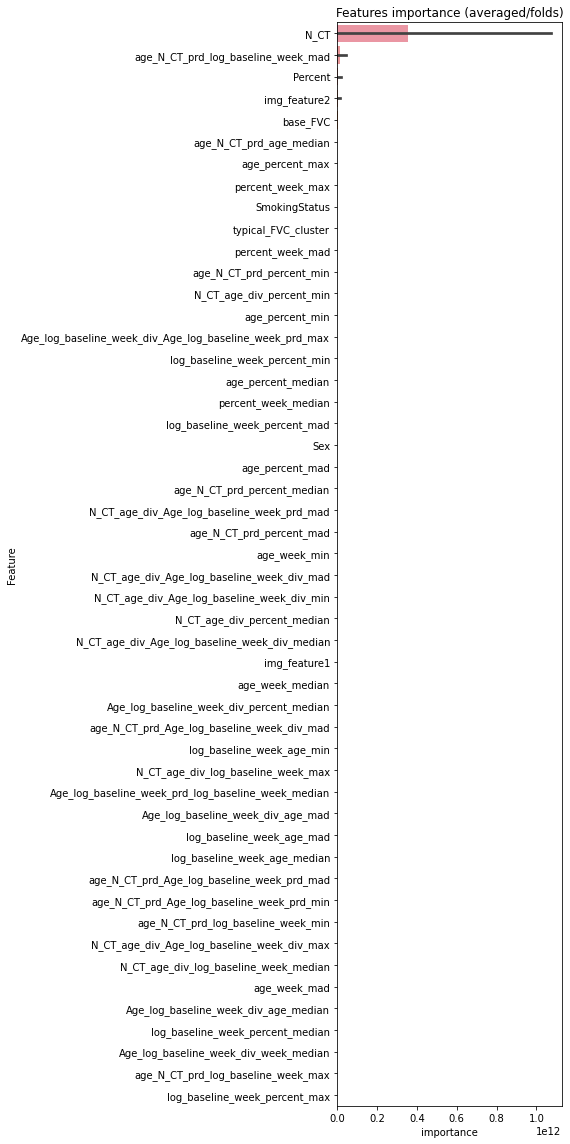

In [51]:
features = train.columns[2:-2]

TARGET = "FVC"
target = train[TARGET]


lgb_model_param = {
    'num_class': 2,
    # 'objective': 'regression',
    'metric': 'None',
    'boosting_type': 'gbdt',
    'learning_rate': 5e-02,
    'seed': 42,
    "subsample": 0.4,
    "subsample_freq": 1,
    'max_depth': 1,
    'verbosity': -1,
}
lgb_fit_param = {
    "num_boost_round": 10000,
    "verbose_eval":100,
    "early_stopping_rounds": 500,
}

feature_importance_df, predictions, oof = run_kfold_lightgbm(
    lgb_model_param, lgb_fit_param, train, test, features, target,
    n_fold=N_FOLD, categorical=[], my_loss=OSICLossForLGBM())
    
show_feature_importance(feature_importance_df, TARGET)

In [52]:
oof[:5, :]

array([[2283.55192052,   37.58213641],
       [2234.33372119,  113.00643137],
       [2094.59980963,  107.56439547],
       [2188.6248706 ,  108.43058492],
       [2133.14541648,  113.87282157]])

In [53]:
predictions[:5]

array([[2950.46611391,   53.62210747],
       [2772.19401393,   68.94472171],
       [1942.92513881,   46.53199858],
       [3243.88745184,   99.36168131],
       [2946.4937917 ,   59.78173982]])

In [62]:
sample

,Patient_Week,Confidence,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,N_CT,min_Weeks,min_week,baseline_week,base_FVC
0,ID00419637202311204720264_-12,53.622107,ID00419637202311204720264,-12,2950.466114,70.186855,73,Male,Ex-smoker,28,NaN,-12,0,3020
1,ID00421637202311550012437_-12,68.944722,ID00421637202311550012437,-12,2772.194014,82.045291,68,Male,Ex-smoker,62,NaN,-12,0,2739
2,ID00422637202311677017371_-12,46.531999,ID00422637202311677017371,-12,1942.925139,76.672493,73,Male,Ex-smoker,473,NaN,-12,0,1930
3,ID00423637202312137826377_-12,99.361681,ID00423637202312137826377,-12,3243.887452,79.258903,72,Male,Ex-smoker,290,NaN,-12,0,3294
4,ID00426637202313170790466_-12,59.781740,ID00426637202313170790466,-12,2946.493792,71.824968,73,Male,Never smoked,408,NaN,-12,0,2925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,ID00419637202311204720264_133,136.605839,ID00419637202311204720264,133,2960.886775,70.186855,73,Male,Ex-smoker,28,NaN,-12,145,3020
726,ID00421637202311550012437_133,160.458055,ID00421637202311550012437,133,2734.440638,82.045291,68,Male,Ex-smoker,62,NaN,-12,145,2739
727,ID00422637202311677017371_133,127.356477,ID00422637202311677017371,133,1939.167116,76.672493,73,Male,Ex-smoker,473,NaN,-12,145,1930
728,ID00423637202312137826377_133,161.837862,ID00423637202312137826377,133,3215.584330,79.258903,72,Male,Ex-smoker,290,NaN,-12,145,3294


In [61]:
sample["FVC"] = predictions[:, 0]
sample["Confidence"] = predictions[:, 1]

In [63]:
sub_columns = ['Patient_Week','FVC','Confidence']
sub = sample[sub_columns]
sub.to_csv("submission.csv",index=False)

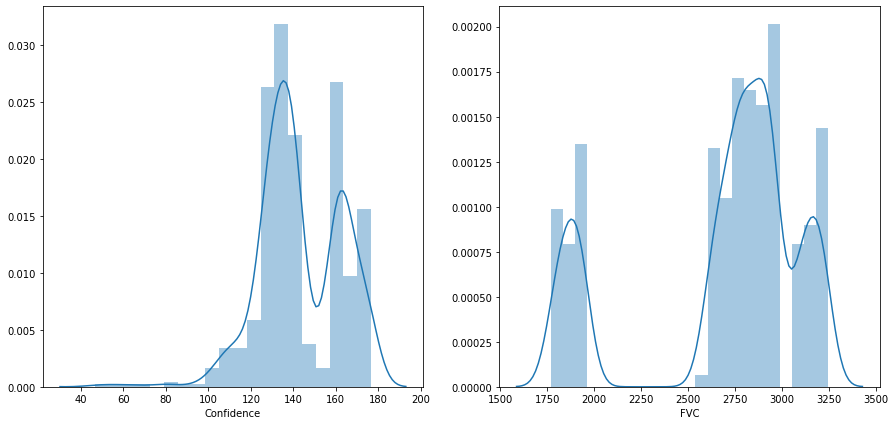

In [64]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(sub.Confidence)
plt.subplot(122)
sns.distplot(sub.FVC);